In [2]:
import pandas as pd
import numpy as np
m = pd.read_csv("/Users/shreyasurana/Desktop/Datasets/ML_HW6_movie.csv")
m.head(5)

,Day_of_Week,Adjusted_Gross,Budget,IMDb_Rating,O_Perc,us_per,profit_per,Runtime_min
0,Friday,202.1,170.0,6.7,0.554,0.446,0.189,130
1,Friday,204.2,66.0,6.6,0.786,0.214,2.080,132
2,Friday,207.1,100.0,6.1,0.809,0.191,1.062,126
3,Friday,208.8,42.0,7.2,0.313,0.687,3.800,109
4,Friday,209.7,150.0,8.0,0.644,0.356,0.369,131


In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
from ggplot import *
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [4]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)

In [9]:
m.head()

,Adjusted_Gross,Budget,IMDb_Rating,O_Perc,us_per,profit_per,Runtime_min
0,202.1,170.0,6.7,0.554,0.446,0.189,130
1,204.2,66.0,6.6,0.786,0.214,2.080,132
2,207.1,100.0,6.1,0.809,0.191,1.062,126
3,208.8,42.0,7.2,0.313,0.687,3.800,109
4,209.7,150.0,8.0,0.644,0.356,0.369,131


In [ ]:
m.drop("Day_of_Week", axis=1,inplace=True)

In [10]:
km.fit(m)
m["y_pred"]= km.predict(m)
m.head(5)

,Adjusted_Gross,Budget,IMDb_Rating,O_Perc,us_per,profit_per,Runtime_min,y_pred
0,202.1,170.0,6.7,0.554,0.446,0.189,130,0
1,204.2,66.0,6.6,0.786,0.214,2.080,132,0
2,207.1,100.0,6.1,0.809,0.191,1.062,126,0
3,208.8,42.0,7.2,0.313,0.687,3.800,109,0
4,209.7,150.0,8.0,0.644,0.356,0.369,131,0


Text(0.5,1,'K Mean Classification')

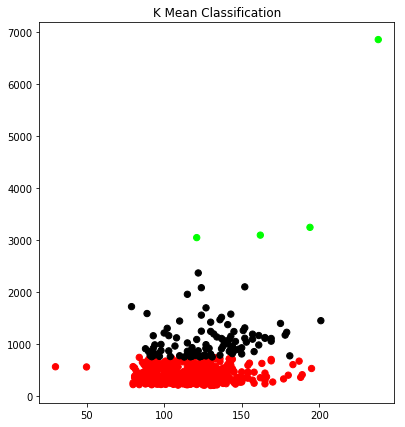

In [21]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(m.Runtime_min, m.Adjusted_Gross, c=colormap[km.labels_], s=40)
plt.title('K Mean Classification')

In [17]:
m.drop("O_Perc", axis=1,inplace=True)
m.drop("us_per", axis=1,inplace=True)
m.drop("profit_per", axis=1,inplace=True)

ValueError: labels ['O_Perc'] not contained in axis

In [31]:
m.drop("y_pred", axis=1,inplace=True)
m.head(5)

,Adjusted_Gross,Budget,IMDb_Rating,Runtime_min
0,202.1,170.0,6.7,130
1,204.2,66.0,6.6,132
2,207.1,100.0,6.1,126
3,208.8,42.0,7.2,109
4,209.7,150.0,8.0,131


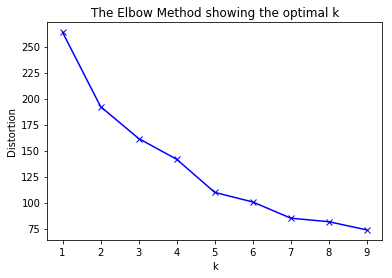

In [25]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(m)
    kmeanModel.fit(m)
    distortions.append(sum(np.min(cdist(m, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / m.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

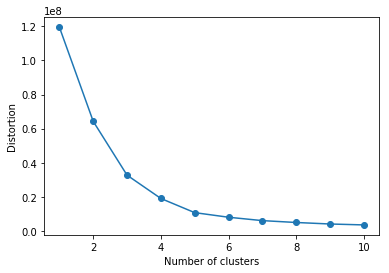

In [40]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(m)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

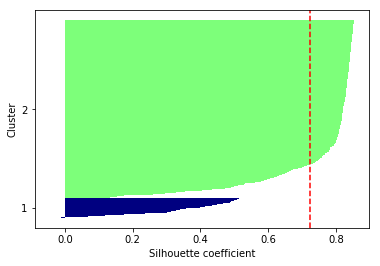

In [51]:
km = KMeans(n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(m)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(m, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
    color="red",
    linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [53]:
km= KMeans(n_clusters=2)
km.fit(m)
m["y_pred"]= km.predict(m)
m.head(5)

,Adjusted_Gross,Budget,IMDb_Rating,Runtime_min,y_pred
0,202.1,170.0,6.7,130,0
1,204.2,66.0,6.6,132,0
2,207.1,100.0,6.1,126,0
3,208.8,42.0,7.2,109,0
4,209.7,150.0,8.0,131,0


Text(0.5,1,'K Mean Classification')

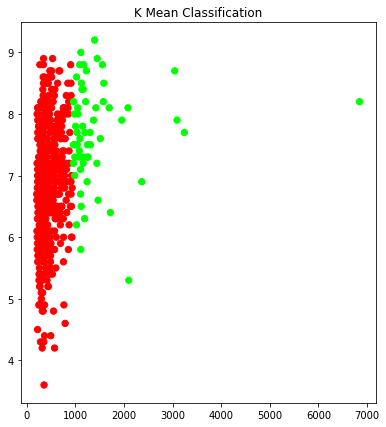

In [54]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime'])
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(m.Adjusted_Gross, m.IMDb_Rating, c=colormap[km.labels_], s=40)
plt.title('K Mean Classification')

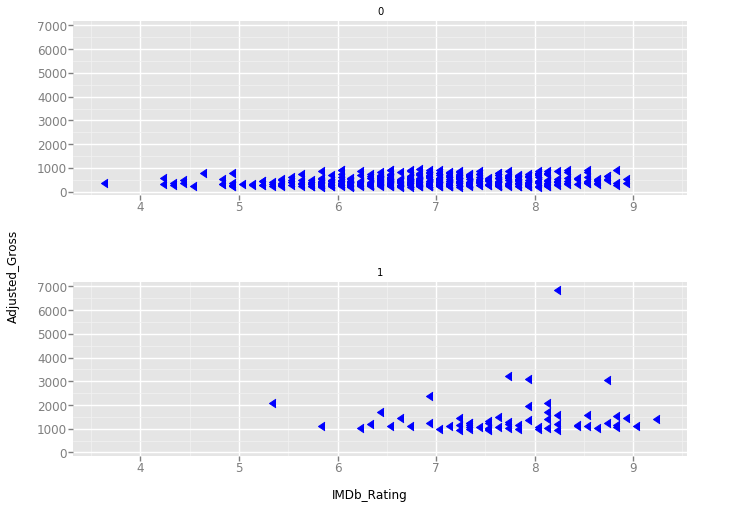

<ggplot: (7543409030)>

In [55]:
ggplot(m, aes(x='IMDb_Rating', y='Adjusted_Gross')) + geom_point(color='blue', shape=4, size=75) + facet_wrap("y_pred")

In [52]:
m.drop("y_pred", axis=1,inplace=True)

In [ ]:
#This dataset does not seem the best to be used for clustering 